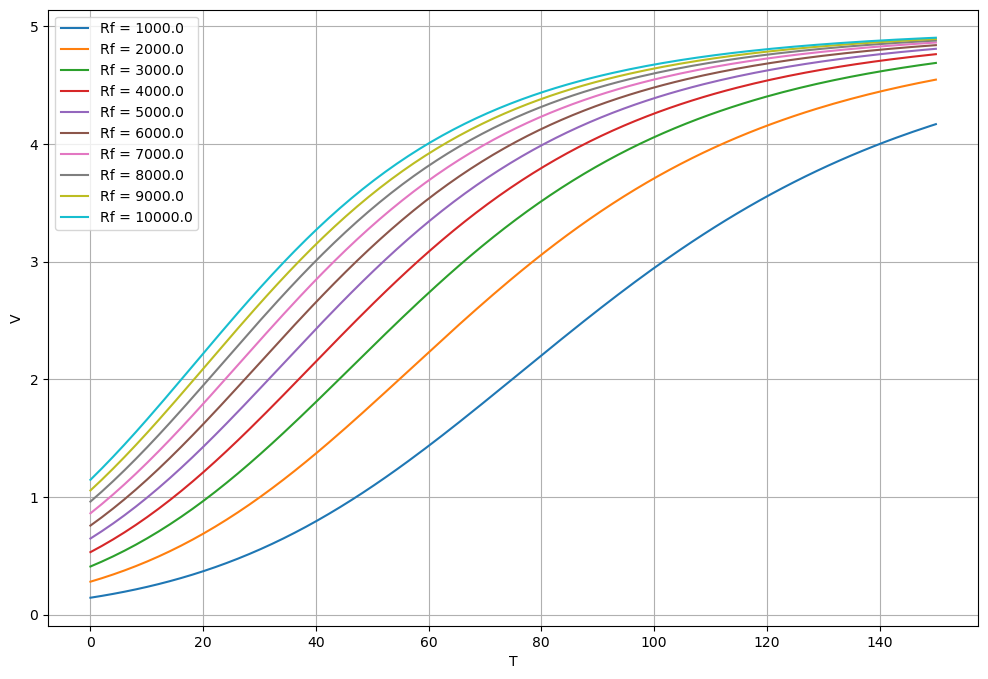

In [1]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 150, 150)
rFixedArr = np.linspace(1000, 10000, 10)

def rThermistor(t):
    R25 = 10000
    B = 3950
    return R25 * np.exp(B * ((1/(t+273.15)) - (1/298.15)))

def Vout(r1, r2):
    Vin = 5
    return Vin * (r2 / (r2 + r1))

plt.figure(figsize=(12, 8))

for i in rFixedArr:
    r1 = rThermistor(t)
    r2 = i

    vOut = Vout(r1, r2)

    plt.plot(t, vOut, label=F"Rf = {i}")

plt.xlabel("T")
plt.ylabel("V")
plt.legend()
plt.grid()
plt.show()


====== Regression Results ======
Slope (B-value): 4962.7398
Intercept: 0.7880
RMSE: 0.055114
R²: 0.993500
Adjusted R²: 0.993368



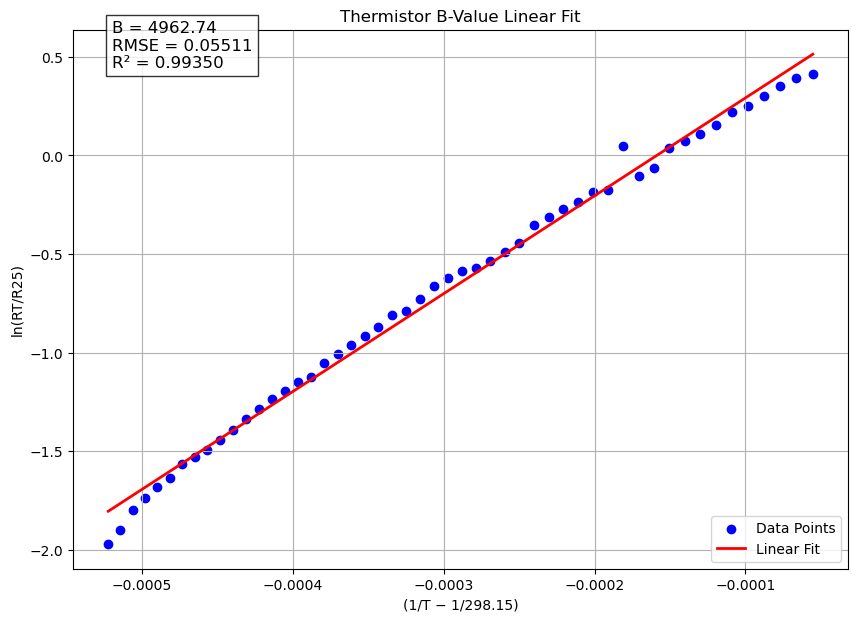

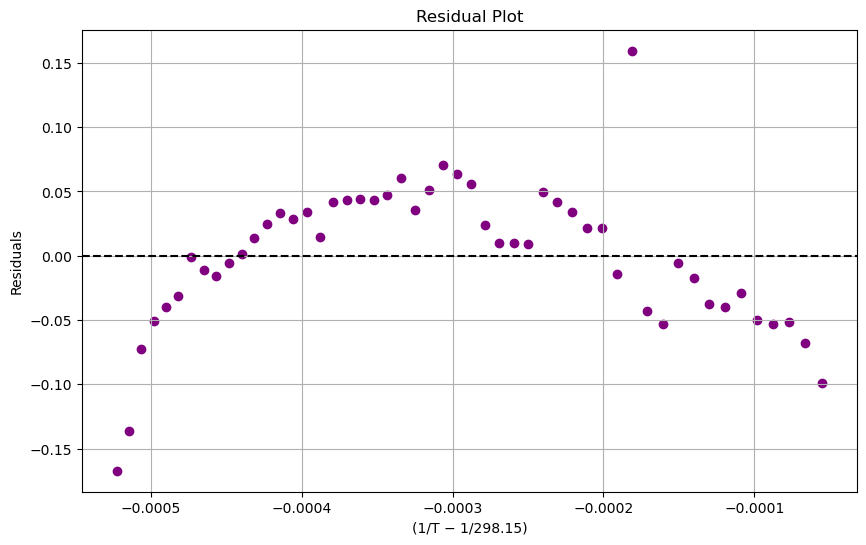

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------
#  DATA
# -------------------------
x = np.array([
-5.53194E-05, -6.6165E-05, -7.69396E-05, -8.76437E-05, -9.82782E-05,
-0.000108844, -0.000119341, -0.00012977, -0.000140132, -0.000150428,
-0.000160659, -0.000170824, -0.000180924, -0.000190961, -0.000200934,
-0.000210845, -0.000220694, -0.000230481, -0.000240207, -0.000249872,
-0.000259478, -0.000269025, -0.000278513, -0.000287943, -0.000297315,
-0.00030663, -0.000315888, -0.00032509, -0.000334237, -0.000343328,
-0.000352366, -0.000361348, -0.000370278, -0.000379154, -0.000387978,
-0.000396749, -0.000405469, -0.000414137, -0.000422755, -0.000431322,
-0.000439839, -0.000448307, -0.000456725, -0.000465095, -0.000473417,
-0.000481691, -0.000489918, -0.000498098, -0.000506231, -0.000514317,
-0.000522358
])

y = np.array([
0.41478484, 0.391607979, 0.35479873, 0.300019753, 0.250231591,
0.218655885, 0.155967343, 0.106809826, 0.075601809, 0.035599536,
-0.062203958, -0.102301954, 0.04967161, -0.173540337, -0.187211542,
-0.236644929, -0.272781386, -0.313622523, -0.3547777, -0.442610055,
-0.489514418, -0.53695284, -0.570536483, -0.584988858, -0.623893417,
-0.663260874, -0.728347845, -0.789742244, -0.810520641, -0.868518976,
-0.917060169, -0.961048217, -1.005918002, -1.05174291, -1.122449593,
-1.146588615, -1.195724406, -1.233570306, -1.285188958, -1.338363336,
-1.393243659, -1.44276708, -1.493914929, -1.531435283, -1.562143338,
-1.633621843, -1.683230807, -1.734589664, -1.796907096, -1.900946214,
-1.971500142
])

# Reshape x for sklearn
x_reshaped = x.reshape(-1, 1)

# -------------------------
# Linear regression model
# -------------------------
model = LinearRegression()
model.fit(x_reshaped, y)

y_pred = model.predict(x_reshaped)
slope = model.coef_[0]
intercept = model.intercept_

# -------------------------
# Metrics
# -------------------------
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

n = len(y)
k = 1  # one predictor
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("\n====== Regression Results ======")
print(f"Slope (B-value): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"RMSE: {rmse:.6f}")
print(f"R²: {r2:.6f}")
print(f"Adjusted R²: {adjusted_r2:.6f}")
print("================================\n")

# -------------------------
# Best-fit Line
# -------------------------
x_line = np.linspace(min(x), max(x), 300)
y_line = slope * x_line + intercept

# -------------------------
# Plot: Data + Fit Line
# -------------------------
plt.figure(figsize=(10, 7))
plt.scatter(x, y, label="Data Points", color='blue')
plt.plot(x_line, y_line, label="Linear Fit", color='red', linewidth=2)

plt.xlabel("(1/T − 1/298.15)")
plt.ylabel("ln(RT/R25)")
plt.title("Thermistor B-Value Linear Fit")
plt.grid(True)
plt.legend()

# Display B-value
plt.text(0.05, 0.93,
         f"B = {slope:.2f}\nRMSE = {rmse:.5f}\nR² = {r2:.5f}",
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# -------------------------
# Residual Plot
# -------------------------
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.xlabel("(1/T − 1/298.15)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


Best Degree: 4
Stats: {'degree': 4, 'rmse_test': np.float64(121.60550805422947), 'rmse_train': np.float64(95.30135111219796), 'adj_r2': 0.9718485954594975}
Final Coefs: [ 0.00000000e+00 -4.63435424e+05  2.02805722e+03 -3.94199815e+00
  2.87135952e-03]
Final Intercept: 39691589.23150708
Final Full RMSE: 99.74079799628652
Final Full R2: 0.9710997195104424


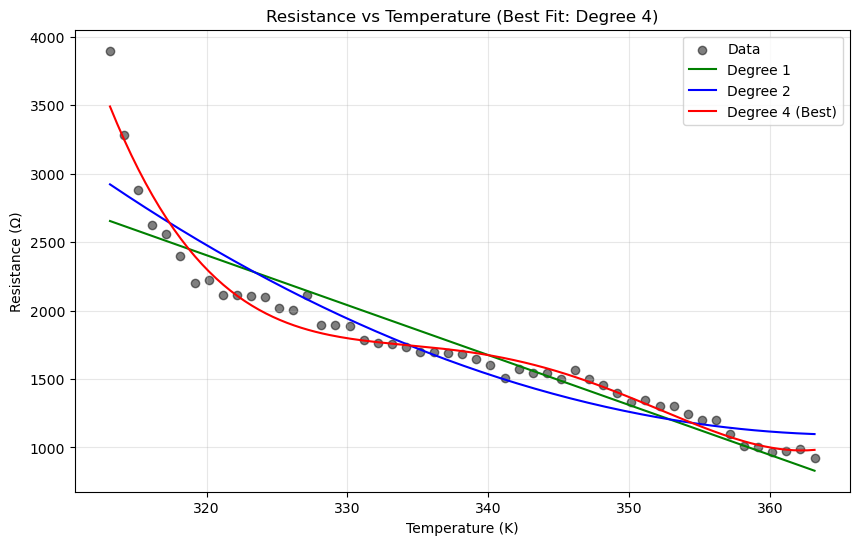

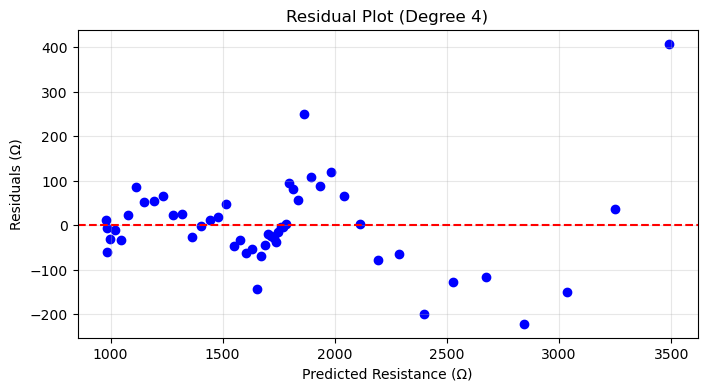

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. Data Transcription (same as before)
data = {
    'Resistor': [
        3899.12, 3285.23, 2884.98, 2622.61, 2560.00, 2400.33, 2200.99, 2222.76, 
        2113.34, 2112.30, 2106.50, 2101.56, 2021.34, 2001.30, 2111.78, 1892.02, 
        1894.10, 1890.00, 1783.30, 1765.50, 1754.00, 1732.76, 1701.03, 1699.90, 
        1693.22, 1684.44, 1645.09, 1602.03, 1509.56, 1576.21, 1543.30, 1544.00, 
        1501.97, 1563.23, 1498.10, 1454.20, 1400.44, 1334.00, 1344.98, 1300.10, 
        1299.80, 1245.60, 1203.45, 1198.34, 1100.00, 1012.34, 1006.34, 965.77, 
        976.56, 989.11, 923.11
    ],
    'Temp_K': [
        313.15, 314.15, 315.15, 316.15, 317.15, 318.15, 319.15, 320.15, 
        321.15, 322.15, 323.15, 324.15, 325.15, 326.15, 327.15, 328.15, 
        329.15, 330.15, 331.15, 332.15, 333.15, 334.15, 335.15, 336.15, 
        337.15, 338.15, 339.15, 340.15, 341.15, 342.15, 343.15, 344.15, 
        345.15, 346.15, 347.15, 348.15, 349.15, 350.15, 351.15, 352.15, 
        353.15, 354.15, 355.15, 356.15, 357.15, 358.15, 359.15, 360.15, 
        361.15, 362.15, 363.15
    ]
}

df = pd.DataFrame(data)

# SWAPPING AXES
# X = Temperature (K)
# y = Resistance (Ohms)
X = df[['Temp_K']].values
y = df['Resistor'].values

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = []
models = {}

# 3. Model Comparison Loop
for degree in range(1, 6):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_test_pred = model.predict(X_test_poly)
    y_train_pred = model.predict(X_train_poly)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    
    # Adjusted R2
    n = len(y_train)
    p = degree + 1
    adj_r2 = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
    
    results.append({
        'degree': degree, 
        'rmse_test': rmse_test, 
        'rmse_train': rmse_train,
        'adj_r2': adj_r2
    })

# Select Best Degree based on Test RMSE
best_degree = min(results, key=lambda x: x['rmse_test'])['degree']
best_stats = min(results, key=lambda x: x['rmse_test'])

# 4. Final Model Training (Full Data)
poly_final = PolynomialFeatures(best_degree)
X_poly_final = poly_final.fit_transform(X)
final_model = LinearRegression()
final_model.fit(X_poly_final, y)
y_pred_final = final_model.predict(X_poly_final)
final_r2 = r2_score(y, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y, y_pred_final))

# 5. Plotting Comparison
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data', alpha=0.5)
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

# Plot degrees 1, 2, and Best
degrees_to_plot = sorted(list(set([1, 2, best_degree])))
colors = ['green', 'blue', 'red', 'purple', 'orange']

for i, d in enumerate(degrees_to_plot):
    p = PolynomialFeatures(d)
    m = LinearRegression()
    m.fit(p.fit_transform(X), y)
    
    label = f'Degree {d}'
    if d == best_degree:
        label += f' (Best)'
        
    plt.plot(X_range, m.predict(p.transform(X_range)), label=label, color=colors[i])

plt.title(f'Resistance vs Temperature (Best Fit: Degree {best_degree})')
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (Ω)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('resistance_vs_temp_plot.png')

# 6. Plotting Residuals
residuals = y - y_pred_final
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_final, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title(f'Residual Plot (Degree {best_degree})')
plt.xlabel('Predicted Resistance (Ω)')
plt.ylabel('Residuals (Ω)')
plt.grid(True, alpha=0.3)
plt.savefig('resistance_vs_temp_residuals.png')

print(f"Best Degree: {best_degree}")
print(f"Stats: {best_stats}")
print(f"Final Coefs: {final_model.coef_}")
print(f"Final Intercept: {final_model.intercept_}")
print(f"Final Full RMSE: {final_rmse}")
print(f"Final Full R2: {final_r2}")

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. Data Transcription
data = {
    'Resistor': [
        3899.12, 3285.23, 2884.98, 2622.61, 2560.00, 2400.33, 2200.99, 2222.76, 
        2113.34, 2112.30, 2106.50, 2101.56, 2021.34, 2001.30, 2111.78, 1892.02, 
        1894.10, 1890.00, 1783.30, 1765.50, 1754.00, 1732.76, 1701.03, 1699.90, 
        1693.22, 1684.44, 1645.09, 1602.03, 1509.56, 1576.21, 1543.30, 1544.00, 
        1501.97, 1563.23, 1498.10, 1454.20, 1400.44, 1334.00, 1344.98, 1300.10, 
        1299.80, 1245.60, 1203.45, 1198.34, 1100.00, 1012.34, 1006.34, 965.77, 
        976.56, 989.11, 923.11
    ],
    'Temp_K': [
        313.15, 314.15, 315.15, 316.15, 317.15, 318.15, 319.15, 320.15, 
        321.15, 322.15, 323.15, 324.15, 325.15, 326.15, 327.15, 328.15, 
        329.15, 330.15, 331.15, 332.15, 333.15, 334.15, 335.15, 336.15, 
        337.15, 338.15, 339.15, 340.15, 341.15, 342.15, 343.15, 344.15, 
        345.15, 346.15, 347.15, 348.15, 349.15, 350.15, 351.15, 352.15, 
        353.15, 354.15, 355.15, 356.15, 357.15, 358.15, 359.15, 360.15, 
        361.15, 362.15, 363.15
    ]
}

df = pd.DataFrame(data)
X = df[['Resistor']].values
y = df['Temp_K'].values

# 2. Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Fit the 4th Degree Model
degree = 4
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# 4. Calculate RMSE for Training and Testing sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)

# Calculate Adjusted R2 for Training
n = len(y_train)
p = degree + 1
adj_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)

# 5. Output the Values
print("-" * 30)
print(f"Polynomial Degree: {degree}")
print("-" * 30)
print(f"Training RMSE: {rmse_train:.4f} K")
print(f"Testing RMSE:  {rmse_test:.4f} K")
print(f"Adjusted R2:   {adj_r2_train:.4f}")
print("-" * 30)

------------------------------
Polynomial Degree: 4
------------------------------
Training RMSE: 1.6203 K
Testing RMSE:  1.2508 K
Adjusted R2:   0.9845
------------------------------


Calculated Time Constant (Tau): 6.25 seconds


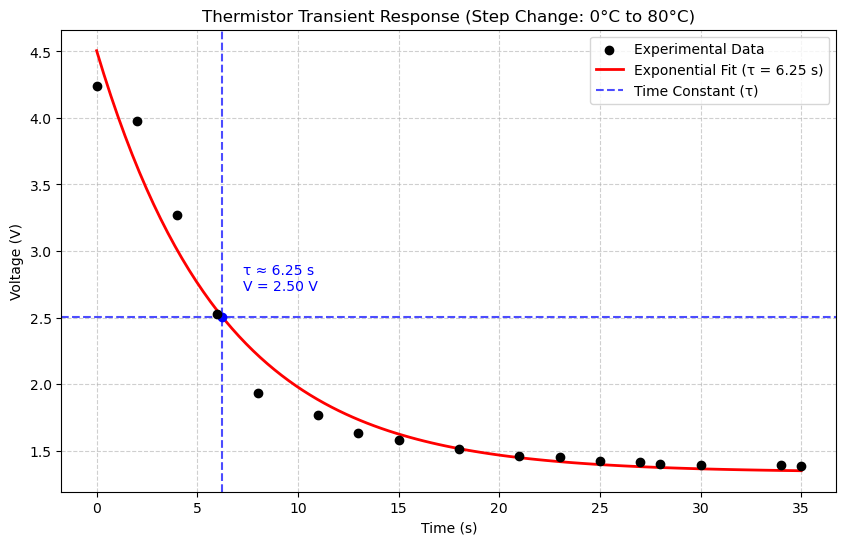

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Data from your experiment
time = np.array([0, 2, 4, 6, 8, 11, 13, 15, 18, 21, 23, 25, 27, 28, 30, 34, 35])
voltage = np.array([4.24, 3.98, 3.27, 2.53, 1.93, 1.77, 1.63, 1.58, 1.51, 1.46, 1.45, 1.42, 1.41, 1.4, 1.39, 1.39, 1.38])

# 2. Define the exponential decay function
# V(t) = (V_initial - V_final) * e^(-t / tau) + V_final
def transient_response(t, tau, v_initial, v_final):
    return (v_initial - v_final) * np.exp(-t / tau) + v_final

# 3. Fit the curve to find Tau
# We provide initial guesses: tau=6.0, v_start=4.24, v_end=1.38
p0 = [6.0, 4.24, 1.38]
params, covariance = curve_fit(transient_response, time, voltage, p0=p0)
tau_fitted, v_init_fitted, v_final_fitted = params

print(f"Calculated Time Constant (Tau): {tau_fitted:.2f} seconds")

# 4. Generate the Plot
plt.figure(figsize=(10, 6))

# Plot raw data
plt.scatter(time, voltage, color='black', label='Experimental Data', zorder=3)

# Plot fitted curve
t_smooth = np.linspace(0, 35, 100)
plt.plot(t_smooth, transient_response(t_smooth, *params), color='red', label=f'Exponential Fit (τ = {tau_fitted:.2f} s)', linewidth=2)

# Mark the time constant
v_at_tau = transient_response(tau_fitted, *params)
plt.axvline(x=tau_fitted, color='blue', linestyle='--', alpha=0.7, label='Time Constant (τ)')
plt.axhline(y=v_at_tau, color='blue', linestyle='--', alpha=0.7)
plt.plot(tau_fitted, v_at_tau, 'bo') # Blue dot

# Add text annotation
plt.text(tau_fitted + 1, v_at_tau + 0.2, f'τ ≈ {tau_fitted:.2f} s\nV = {v_at_tau:.2f} V', color='blue')

# Labels
plt.title('Thermistor Transient Response (Step Change: 0°C to 80°C)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()